<a href="https://colab.research.google.com/github/davidwan08/Coding-Dojo-Code-Exercises/blob/main/David_Wan_3_21_Challenge_Clustering_mini_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

## Clustering - Mini Hackathon 
Make a copy of this notebook to edit!

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.searchenginejournal.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fcopy-the-colab-notebook-to-your-google-drive-5f2579179f746.jpg&f=1&nofb=1" alt="Make a copy" class="center" height="200">

</center>


# ⛹ Task : 
Your task is to use the same [dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv) we used in today's sample Clustering hackathon to create clusters using different features than just 'lat' and 'long' that would be useful to either 
> a) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. **(no train test split required)** OR

> b) Improve a supervised learning model to predict the price of a house.  You can use any model you want, but must include cluster labels as a feature.**If you choose this option, you must train test split.**

# This data is clean and all numeric, so you should be able to go straight into tuning your KMeans model.

The data given is adapted from [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv).The data dictionary is given below:
- price: selling price of home
- rooms: number of rooms other than bedrooms and bathrooms  
- bed: number of bedrooms
- bath: number of bathrooms
- car: number of car spots
- land: land size in meters
- lat: Latitude
- long: Longitude

## In 2 minutes report: 
1. Which task did you choose, a or b?
2. Which features did you use?
3. How many clusters did you make?
4. How are the clusters different? 
  **OR**   
Did they improve your supervised learning model vs not using them?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Load Data
# Load Data
mel = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv')
mel.head()


,price,rooms,bed,bath,car,land,lat,long
0,1480000,2,2,1,1,202,-37.7996,144.9984
1,1035000,2,2,1,0,156,-37.8079,144.9934
2,1465000,3,3,2,0,134,-37.8093,144.9944
3,850000,3,3,2,1,94,-37.7969,144.9969
4,1600000,4,3,1,2,120,-37.8072,144.9941


In [3]:
# Drop duplicates when present.
mel.drop_duplicates(inplace = True)
mel.duplicated().sum()

0

In [4]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17479 entries, 0 to 17500
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17479 non-null  int64  
 1   rooms   17479 non-null  int64  
 2   bed     17479 non-null  int64  
 3   bath    17479 non-null  int64  
 4   car     17479 non-null  int64  
 5   land    17479 non-null  int64  
 6   lat     17479 non-null  float64
 7   long    17479 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [14]:
# (a) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. 
# (no train test split required)
scaler = StandardScaler()
scaled_mel = pd.DataFrame(scaler.fit_transform(mel), columns = mel.columns)
scaled_mel.head()

,price,rooms,bed,bath,car,land,lat,long
0,0.746423,-1.112033,-1.078547,-0.829963,-0.695833,-0.102581,0.072641,0.020286
1,-0.047987,-1.112033,-1.078547,-0.829963,-1.704246,-0.114663,-0.020006,-0.022288
2,0.719645,-0.044406,-0.025837,0.623200,-1.704246,-0.120441,-0.035633,-0.013773
3,-0.378247,-0.044406,-0.025837,0.623200,-0.695833,-0.130947,0.102779,0.007514
4,0.960645,1.023222,-0.025837,-0.829963,0.312580,-0.124118,-0.012192,-0.016328


In [15]:
modified_mel = scaled_mel[['bed','land']]
modified_mel.head()

,bed,land
0,-1.078547,-0.102581
1,-1.078547,-0.114663
2,-0.025837,-0.120441
3,-0.025837,-0.130947
4,-0.025837,-0.124118


Text(0, 0.5, 'inertia')

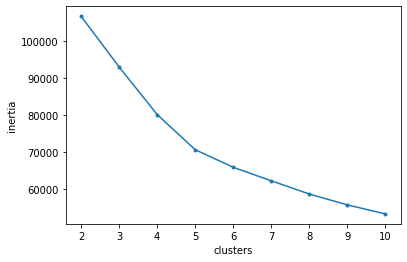

In [19]:
# Create an empty list of inertias to store values.
inertias = []

# Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_mel)  
    inertias.append(kmeans.inertia_)

# Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

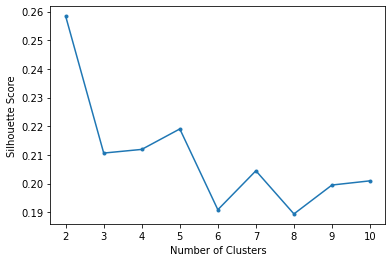

In [21]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_mel)
  silhouette_scores.append(silhouette_score(scaled_mel, kmeans.labels_))
  
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [39]:
kmeans = KMeans(n_clusters= 5, random_state = 42)
kmeans.fit(scaled_mel)
scaled_mel['cluster'] = kmeans.labels_
scaled_mel.head()

,price,rooms,bed,bath,car,land,lat,long,cluster
0,0.746423,-1.112033,-1.078547,-0.829963,-0.695833,-0.102581,0.072641,0.020286,1
1,-0.047987,-1.112033,-1.078547,-0.829963,-1.704246,-0.114663,-0.020006,-0.022288,1
2,0.719645,-0.044406,-0.025837,0.623200,-1.704246,-0.120441,-0.035633,-0.013773,3
3,-0.378247,-0.044406,-0.025837,0.623200,-0.695833,-0.130947,0.102779,0.007514,0
4,0.960645,1.023222,-0.025837,-0.829963,0.312580,-0.124118,-0.012192,-0.016328,3


In [37]:
scaled_mel.shape

(17479, 8)

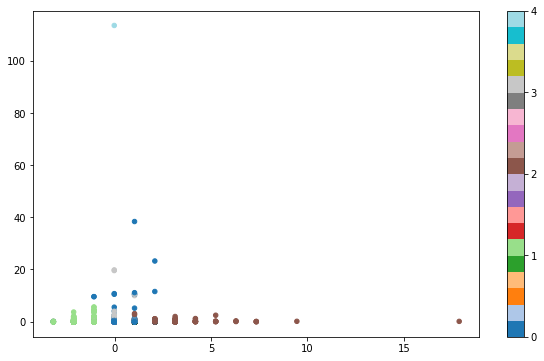

In [45]:
# kmeans
plt.figure(figsize=(10,6))
plt.scatter(x=scaled_mel["bed"], y=scaled_mel["land"], c=kmeans.labels_, 
         cmap = 'tab20', s=20)
ticks = np.sort(np.unique(kmeans.labels_))
plt.colorbar(ticks=ticks);
# I cannot seem to figure out how to get the below code to work.
#bottom, top = plt.ylim(0,50);

In [43]:
mel['bed'].value_counts()

3     7937
2     4021
4     3921
5      777
1      694
6       84
0       16
7       13
8        7
10       4
9        3
20       1
12       1
Name: bed, dtype: int64

In [42]:
import plotly.express as px

px.scatter_3d(scaled_mel, x='bed',y='land',color='cluster')

In [ ]:
# (b) Improve a supervised learning model to predict the price of a house. 
# You can use any model you want, but must include cluster labels as a feature. 
# If you choose this option, you must train test split.


